# Forecast & Predictions -  Machine Learning

The gym chain Model Fitness is developing a customer interaction strategy based on analytical data. In order to fight churn, Model Fitness has digitized a number of its customer profiles. Your task is to analyze them and come up with a customer retention strategy.

Plan of Research:

1. Download the data
2. Carry out exploratory data analysis (EDA) conclusions
3. Build a model to predict user churn conclusions
4. Create user clusters conclusions
5. Come up with conclusions recommendations 

## Download Data

In [1]:
#import libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import scipy.stats as st
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

In [2]:
gym = pd.read_csv('/datasets/gym_churn_us.csv') #load file

In [3]:
gym.head() #show the first rows

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
gym.shape

(4000, 14)

The DataFrame contains 14 columns and 4000 entries. There aren't null values.

Model Fitness provided a CSV file containing cancellation data for a specific month and information for the month preceding it. The dataset includes the following fields:

'Churn' — the cancellation for the month in question; 1-Cancellation, 0-No cancellation

Current dataset fields:

User data from the previous month:

* 'gender' - the user's gender; 1-Male, 0-Female
* 'Near_Location' — if the user lives or works in the neighborhood where the gym is located
* 'Partner' — if the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information about the clients' employers)
* 'Promo_friends' — if the user originally signed up using a "bring a friend" offer (a friend's promo code was used when they paid for the first pass)
* 'Phone' — if the user provided the phone number
* 'Age' - age of the user
* 'Lifetime' — the time (in months) since the user first arrived at the gym

Visit and purchase log data and current membership status data:

* 'Contract_period' — 1 month, 3 months, 6 months or 1 year
* 'Month_to_end_contract' — the months remaining until the contract expires
* 'Group_visits' — whether the user participates in group sessions
* 'Avg_class_frequency_total' — average frequency of visits per week over the customer's lifetime
* 'Avg_class_frequency_current_month' — average frequency of visits per week during the current month
* 'Avg_additional_charges_total' — total amount of money spent on other gym services: cafeteria, sports products, cosmetics, massages, etc.

In [6]:
gym.columns = gym.columns.str.lower() #Let's modify column names for uniformity purposes
gym.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

## Exploratory Data Analysis (EDA)

In [7]:
gym.describe() #general descriptive statistics 

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [8]:
mean_values_by_churn = gym.groupby('churn').mean()
mean_values_by_churn

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


In [9]:


def bar_graph(data, var_grouped, var_categorical, palette = 'viridis'):
    """
    Plots the churn rate against a categorical variable.
    
    Parameters:
    data (pd.DataFrame): The DataFrame containing the 'churn' variable and categorical variables.
    var_grouped (str): The variable by which the grouping will be done ('churn').
    var_categorical (str): The categorical variable for which the frequencies will be obtained.
    """
    # Group the data and calculate normalized frequencies
    grouped = data.groupby(var_grouped)[var_categorical].value_counts(normalize=True)
    
    # Rename the resulting series to 'frequency'
    grouped.name = 'frequency'
    
    # Convert the series to a DataFrame and reset the index
    grouped = grouped.to_frame().reset_index()
    
    # Create the bar plot
    plt.figure(figsize=(9, 5))
    sns.barplot(data=grouped, x=var_grouped, y='frequency', hue=var_categorical)
    
    # Add labels to each bar
    for rect in plt.gca().patches:
      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        
       
        label = "{:.1%}".format(y_value)
        
        plt.gca().annotate(
            label,                      
            (x_value, y_value),        
            xytext=(0, 3),             
            textcoords="offset points",
            ha='center',              
            va='bottom',               
            rotation=45)                
     
    plt.ylim(0, grouped['frequency'].max() * 1.3)
    
    plt.title('Graph '+var_grouped+' vs '+var_categorical.capitalize())
    plt.xlabel(var_grouped.capitalize())
    plt.ylabel('Proportion')
    
    plt.legend(title=var_categorical.capitalize(), loc='best')
    plt.show()

### Churn vs. Gender graph

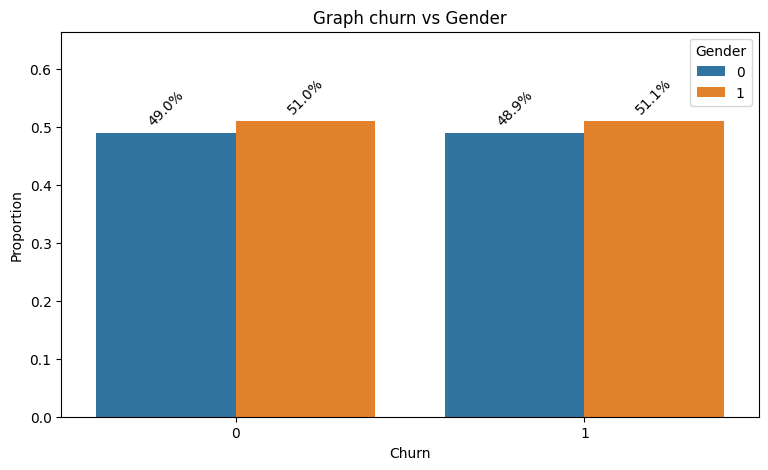

In [10]:
bar_graph(gym, 'churn', 'gender', palette='viridis') #call bar_graph function

Interestingly, the gender distribution among users who canceled their subscription (51.1% male) is remarkably similar to that of users who maintain their membership (51% male)

### Churn vs. location

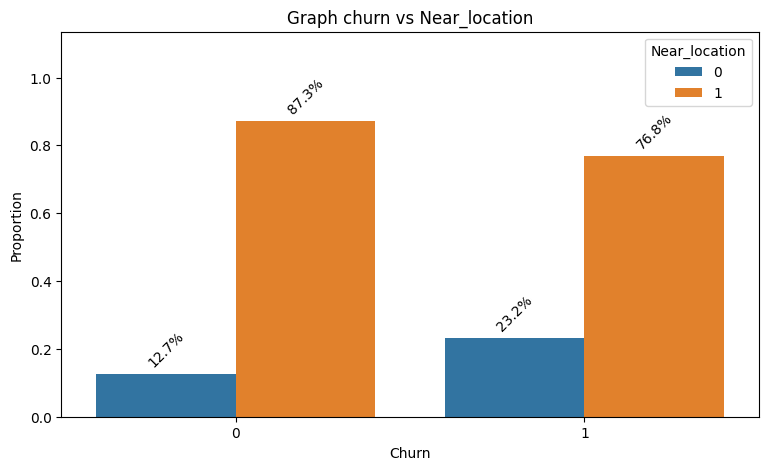

In [11]:
bar_graph(gym, 'churn', 'near_location')

A substantial proportion (76.8%) of users who canceled their subscription live near the gym.This suggests that proximity to the gym does not necessarily guarantee user retention. Despite being close, these users still chose to cancel their membership. On the other hand, among the users who maintained their subscription, 87.3% live near the gym. This shows that a large majority of retained users are those who live close to the gym, suggesting that convenience plays a significant role in their decision to stay.

### Churn vs. Partner graph

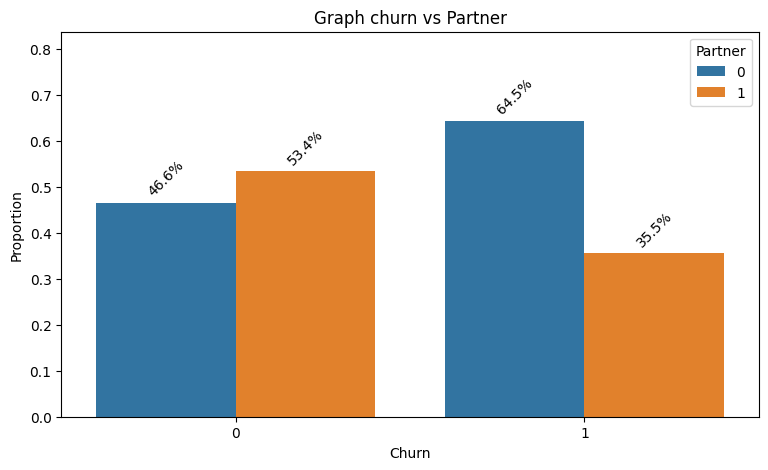

In [12]:
bar_graph(gym, 'churn', 'partner')

We can see that 64.5% of the users who canceled their subscriptions do not belong to any company associated with the gym. Of the users who maintain their subscriptions, 53.4% ​​belong to a company associated with the gym.

### Churn vs. Promotions/friend graph

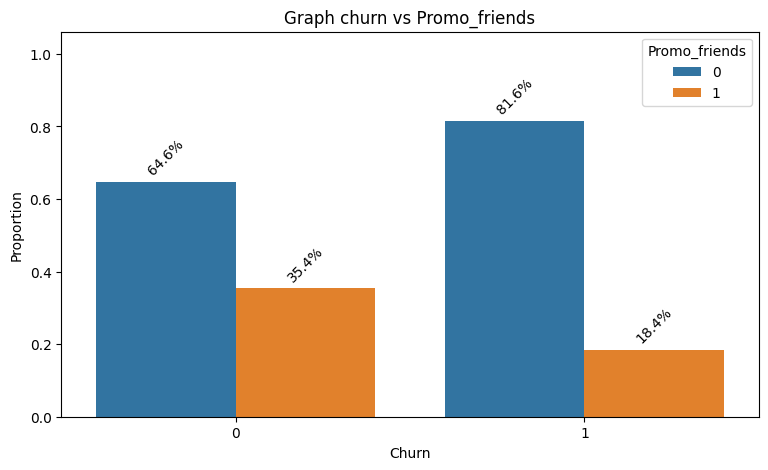

In [13]:
bar_graph(gym, 'churn', 'promo_friends')

A significant proportion (81.6%) of the users who canceled their subscription did not use the "Sign up with a friend" promotion.
This suggests that users who join the gym without taking advantage of the promotional offer are more likely to cancel their membership. Among the users who maintained their subscription, 64.6% did not use the "Sign up with a friend" promotion.
This shows that while a majority of retained users also did not use the promotion, the retention rate is higher compared to those who churned.

### Churn vs. Group Visits

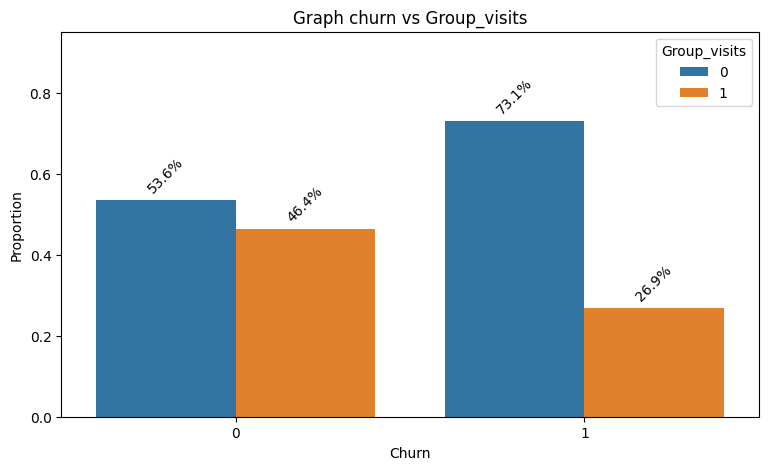

In [14]:
bar_graph(gym, 'churn', 'group_visits')

A considerable proportion (53.6%) of users who canceled their subscriptions did not participate in group visits. A significant proportion (73.1%) of users who maintained their subscriptions participated in group visits. Participation in group visits has a positive impact on user retention. Users who engage in group activities are more likely to stay subscribed, indicating that group visits contribute to a sense of belonging and enjoyment.

### Churn vs. Contract Period

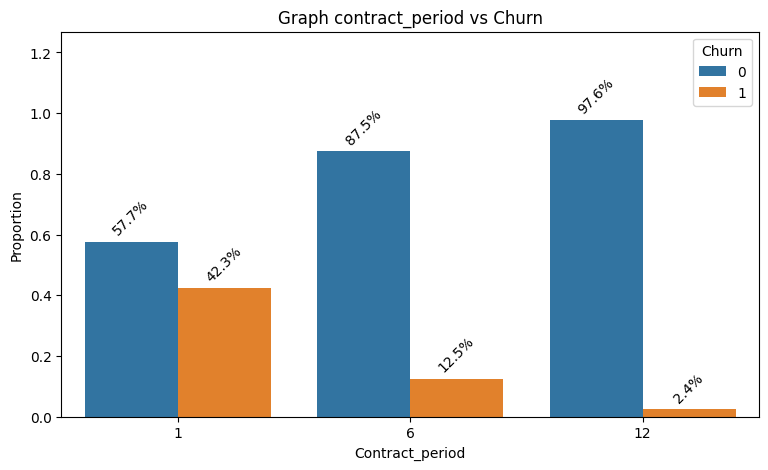

In [15]:
bar_graph(gym,  var_grouped = 'contract_period', var_categorical = 'churn')

We can see that of the users who contracted a plan for one month, 57.7% kept their plan. Of those who contracted a plan for six months, 87.5% of users maintained their plan, and of those who contracted a plan for twelve months, 97.6% of users maintained their plan.
Users with extended contract periods (six or twelve months) are significantly more likely to maintain their membership than those with shorter contract periods (one month).

### Churn vs. Age

In [16]:
def bar_graph(data, var_grouped, var_categorical, palette='viridis'):
    """
    Plots the churn rate against a categorical variable.
    
    Parameters:
    data (pd.DataFrame): The DataFrame containing the 'churn' variable and categorical variables.
    var_grouped (str): The variable by which the grouping will be done ('churn').
    var_categorical (str): The categorical variable for which the frequencies will be obtained.
    """
    # Group the data and calculate normalized frequencies
    grouped = data.groupby(var_grouped)[var_categorical].value_counts(normalize=True)
    
    # Rename the resulting series to 'frequency'
    grouped.name = 'frequency'
    
    # Convert the series to a DataFrame and reset the index
    grouped = grouped.to_frame().reset_index()
    
    # Create the bar plot
    plt.figure(figsize=(9, 5))
    sns.barplot(data=grouped, x=var_grouped, y='frequency', hue=var_categorical, palette=palette)

    # Add labels to each bar if the variable is not 'age' or 'lifetime'
    if var_categorical not in ['age', 'lifetime']:
        for rect in plt.gca().patches:
            height = rect.get_height()
            if height > 0:  # Only annotate bars with positive heights
                plt.gca().annotate(f"{height:.1%}", 
                                   (rect.get_x() + rect.get_width() / 2, height), 
                                   ha='center', va='bottom', 
                                   fontsize=8, rotation=45)  # Smaller font size and rotated text

    plt.ylim(0, grouped['frequency'].max() * 1.2)
    plt.title(f'Graph {var_grouped.capitalize()} vs {var_categorical.capitalize()}')
    plt.xlabel(var_grouped.capitalize())
    plt.ylabel('Proportion')

    plt.legend(title=var_categorical.capitalize(), loc='center left', bbox_to_anchor=(1, 0.5))  # Move legend further to the right
    plt.show()

# Example usage
# Assuming 'gym' is your DataFrame and you want to plot 'churn' against 'age' and 'lifetime'




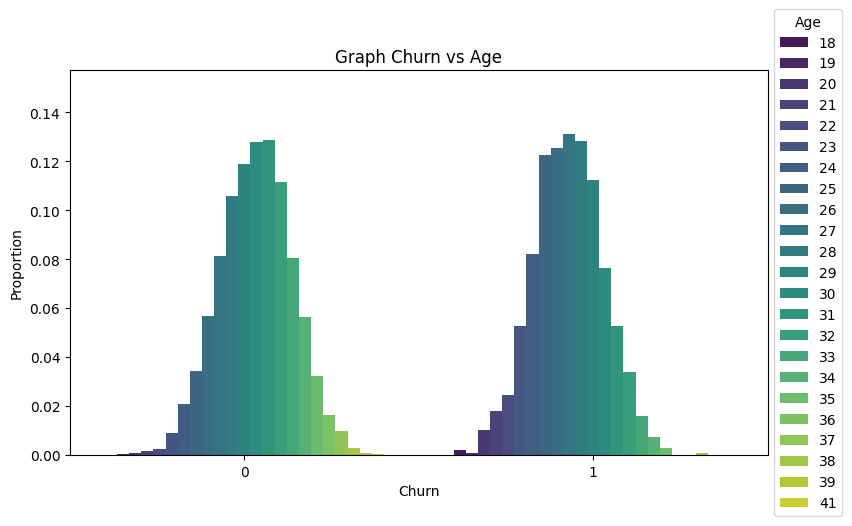

In [17]:
bar_graph(gym, 'churn', 'age')

The plot reveals significant differences in churn rates across different age groups. Younger users (18-22) have high churn rates, indicating a need for targeted engagement strategies. Middle-aged users (31-36) and older users (37-41) show high retention rates, suggesting satisfaction with the gym’s services. Understanding these trends can help the gym develop age-specific strategies to improve overall retention and user satisfaction.

### Churn vs. Month to end contract

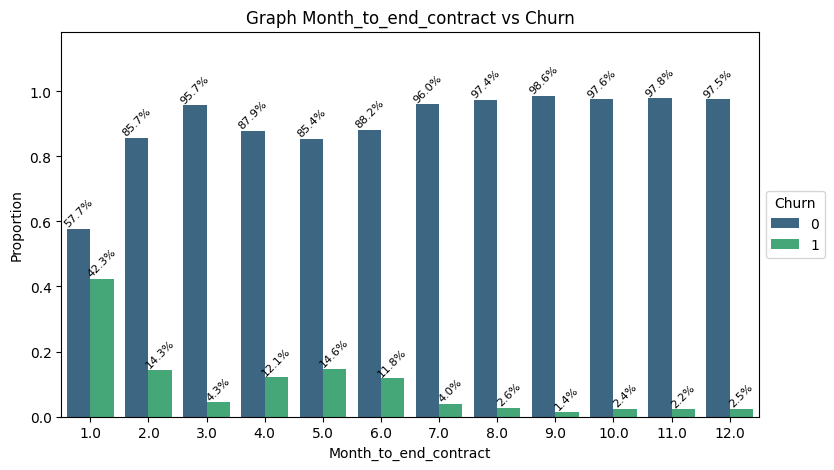

In [18]:
bar_graph(gym,  var_grouped = 'month_to_end_contract', var_categorical = 'churn')

Users with only one month left on their contracts have a churn rate of 42.3%, indicating that a significant portion of users cancel their memberships as their contracts near the end. Users with 2 to 6 months remaining on their contracts show higher retention rates, with churn rates ranging from 14.3% to 12.1%. Users with 7 to 12 months remaining on their contracts exhibit very high retention rates, with churn rates dropping significantly.

There is a clear trend of increasing retention rates as the time left on the contract increases.
Users with more months remaining on their contracts are less likely to churn, showing a solid commitment to their memberships. 

### Churn vs. Lifetime

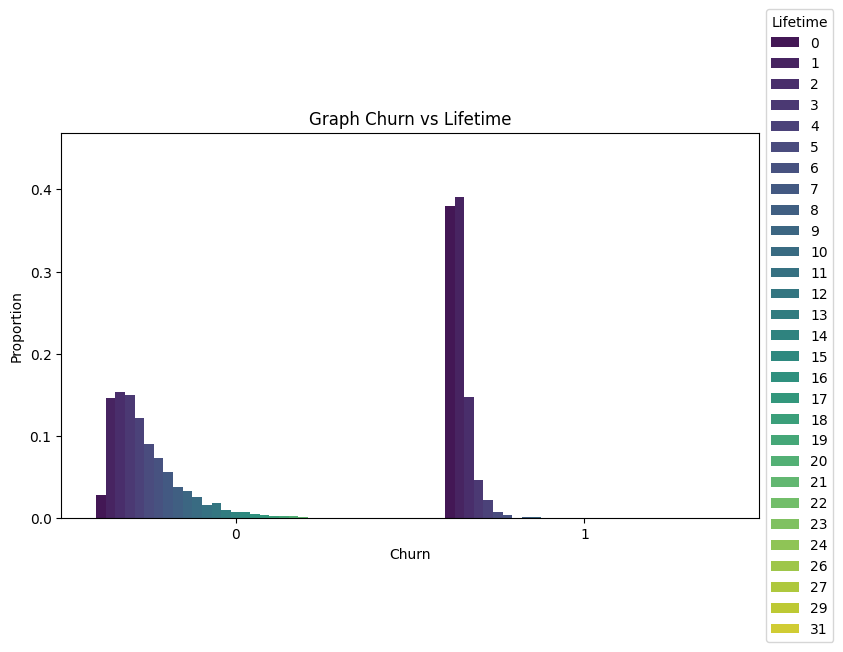

In [19]:
bar_graph(gym, 'churn', 'lifetime')

We can see that 82.8% of users who did not go to the gym after signing up canceled their subscriptions, and 49.1% of users who went to the gym at least one month after registering canceled their registration. This graph is indicative that the more a user goes to the gym, the less likely they are to cancel their subscription.

### Churn vs. Avg Additional Charges Total

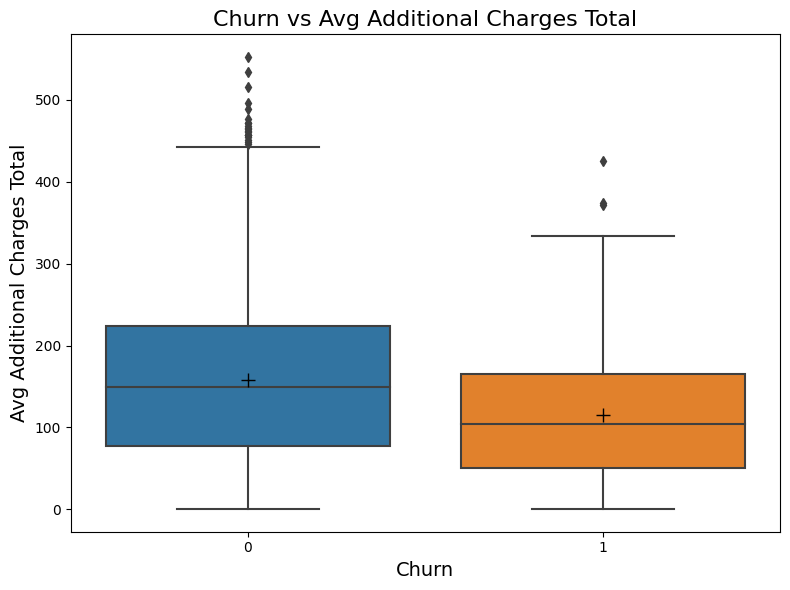

In [20]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(data=gym, y='avg_additional_charges_total', x='churn', 
            showmeans=True, 
            meanprops={"marker": "+", "markeredgecolor": "black", "markersize": "10"})
plt.title('Churn vs Avg Additional Charges Total', fontsize=16)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Avg Additional Charges Total', fontsize=14)
plt.tight_layout()
plt.show()

The box plot indicates that users who spend more on additional charges are less likely to churn. Non-churned users have higher median spending, more significant variation in spending behaviors, and more outliers, suggesting higher engagement with additional services.

### Churn vs. Avg class frequency

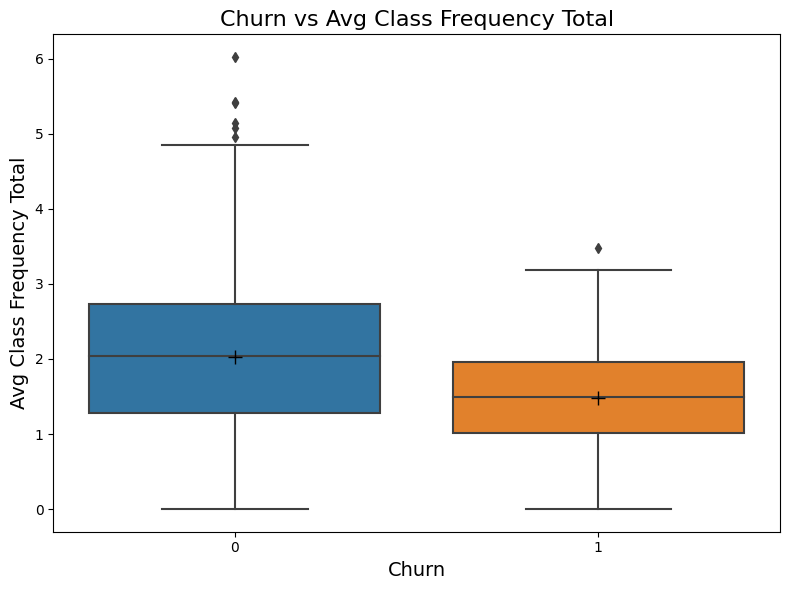

In [21]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(data=gym, y='avg_class_frequency_total', x='churn', 
            showmeans=True, 
            meanprops={"marker": "+", "markeredgecolor": "black", "markersize": "10"})
plt.title('Churn vs Avg Class Frequency Total', fontsize=16)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Avg Class Frequency Total', fontsize=14)
plt.tight_layout()
plt.show()

The box plot indicates that higher class attendance is associated with lower churn rates. Non-churned users have a higher median class frequency and more significant variation in attendance, showing more frequent engagement with classes.

### Churn vs. Avg class frequency current month

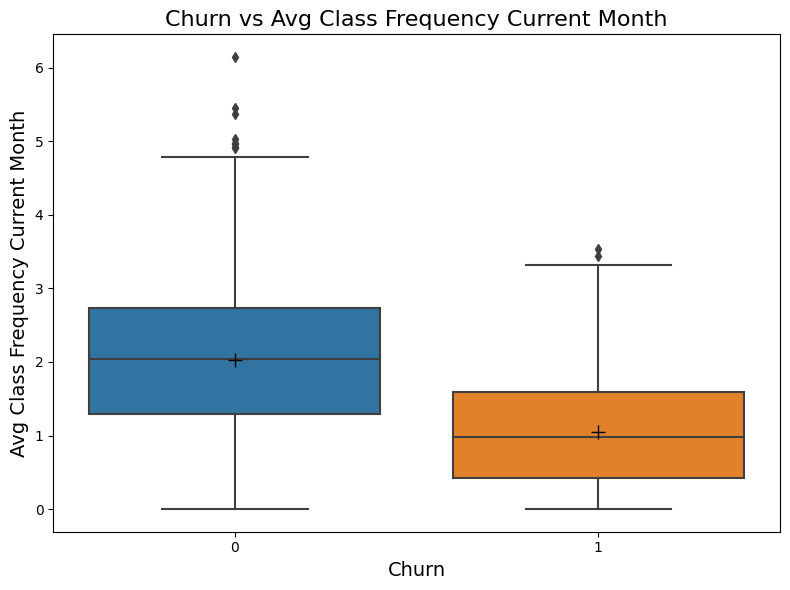

In [22]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(data=gym, y='avg_class_frequency_current_month', x='churn', 
            showmeans=True, 
            meanprops={"marker": "+", "markeredgecolor": "black", "markersize": "10"})
plt.title('Churn vs Avg Class Frequency Current Month', fontsize=16)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Avg Class Frequency Current Month', fontsize=14)
plt.tight_layout()
plt.show()

We can observe that, on average, clients who remain have more visits to group activities in the current month, while clients who leave have a lower average. Therefore, a lower frequency of group activity visits in the current month may be an indicator that a client is about to leave.

## Numeric Characteristic distributions and Correlation Matrix

Let's now see a distribution graph for the variables 'avg_additional_charges_total,' 'avg_class_frequency_total,',' and 'avg_class_frequency_current_month,' based on whether the user canceled their plan.

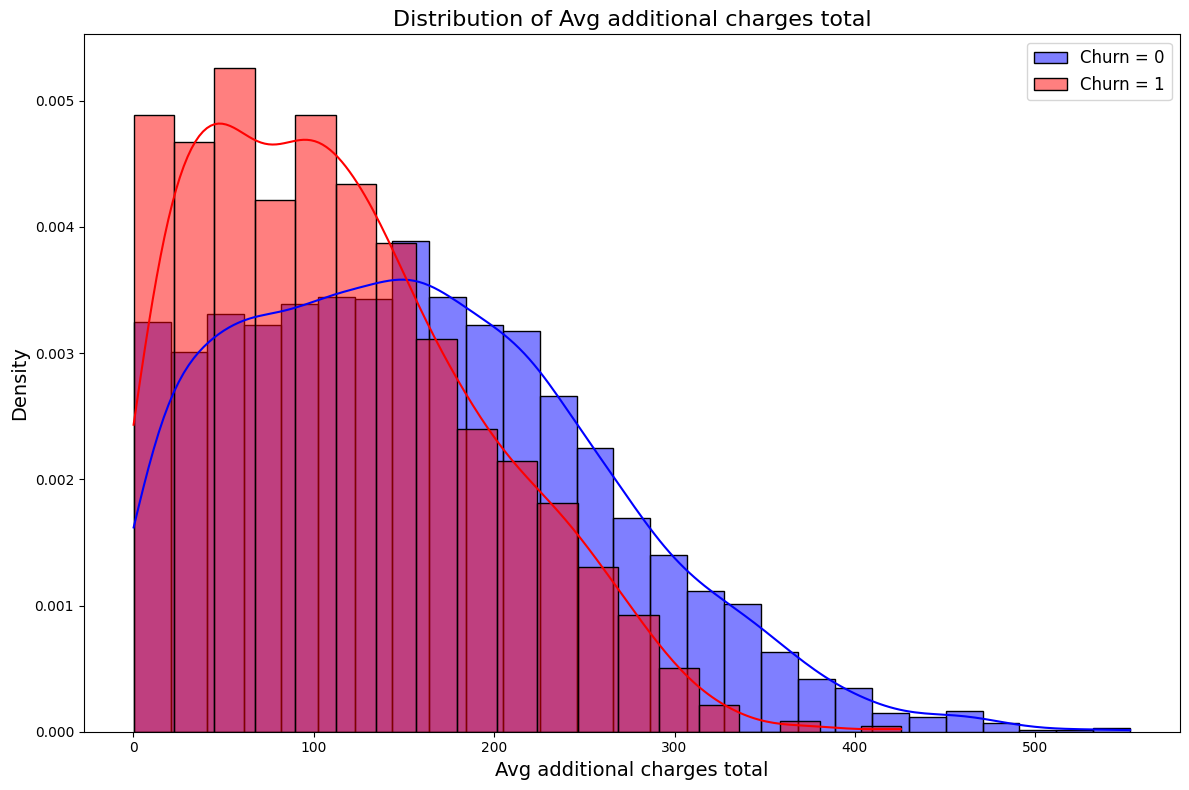

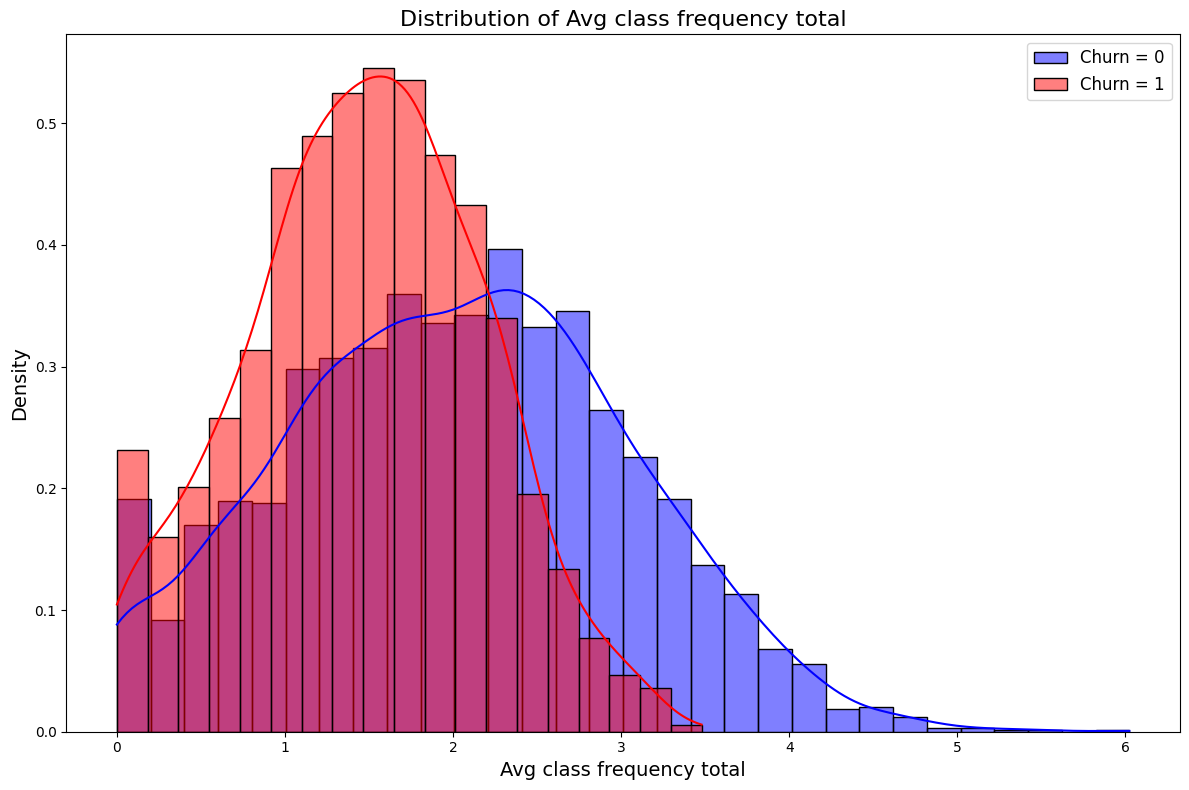

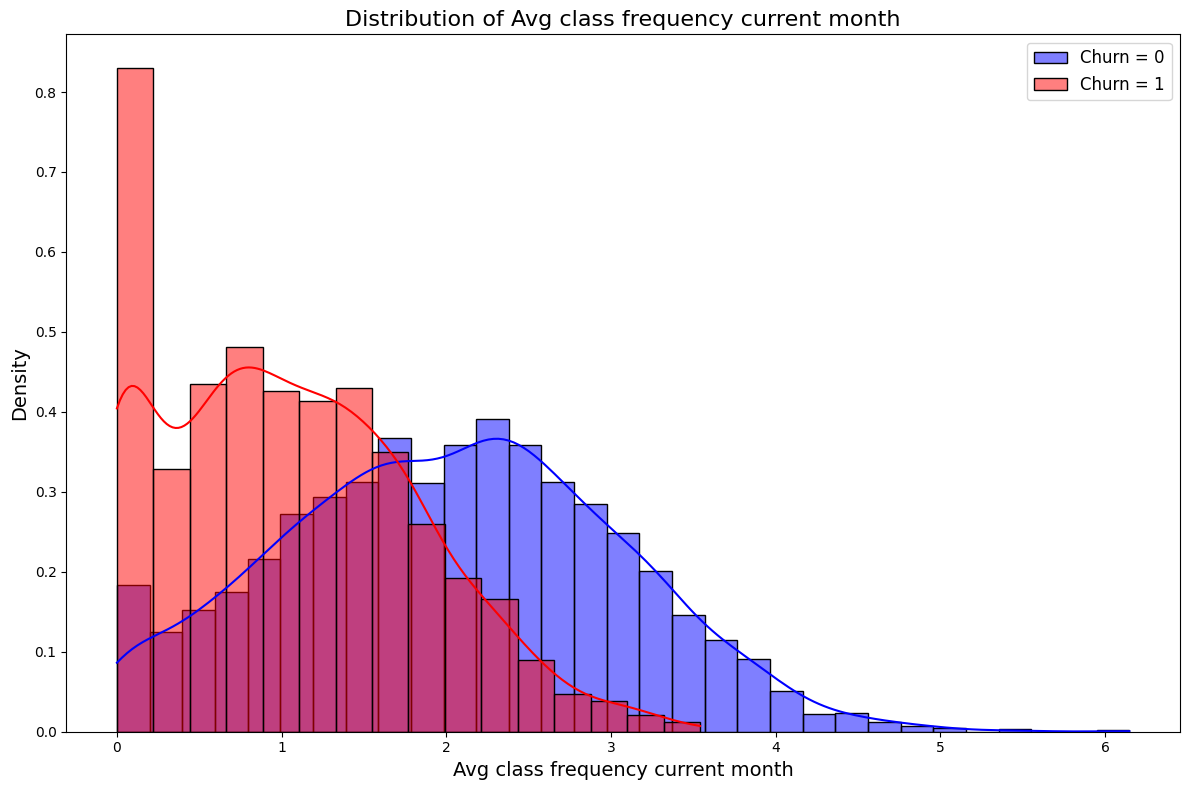

In [23]:
# List of variables to plot
variables = ['avg_additional_charges_total', 'avg_class_frequency_total', 'avg_class_frequency_current_month']

# Loop through each variable and plot histograms
for var in variables:
    # Create the subsets of data
    data_1 = gym.query('churn == 1')
    data_0 = gym.query('churn == 0')
    # Create the plot
    plt.figure(figsize=(12, 8))
    # Histogram for users who did not churn
    sns.histplot(data_0[var], color='blue', label='Churn = 0', kde=True, stat="density", common_norm=False)
     # Histogram for users who churned
    sns.histplot(data_1[var], color='red', label='Churn = 1', kde=True, stat="density", common_norm=False)
    
    # labels/legends
    plt.title(f'Distribution of {var.replace("_", " ").capitalize()}', fontsize=16)
    plt.xlabel(var.replace("_", " ").capitalize(), fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.legend(loc='best', fontsize=12)
    plt.tight_layout()
    plt.show()



The avg_additional_charges_total, avg_class_frequency_total, and avg_class_frequency_current_month distributions are not normally distributed for churned and non-churned users. They exhibit right-skewness, with most users having lower values and a few having higher values. This non-normality suggests that many users have lower engagement, which could be linked to a higher churn rate.

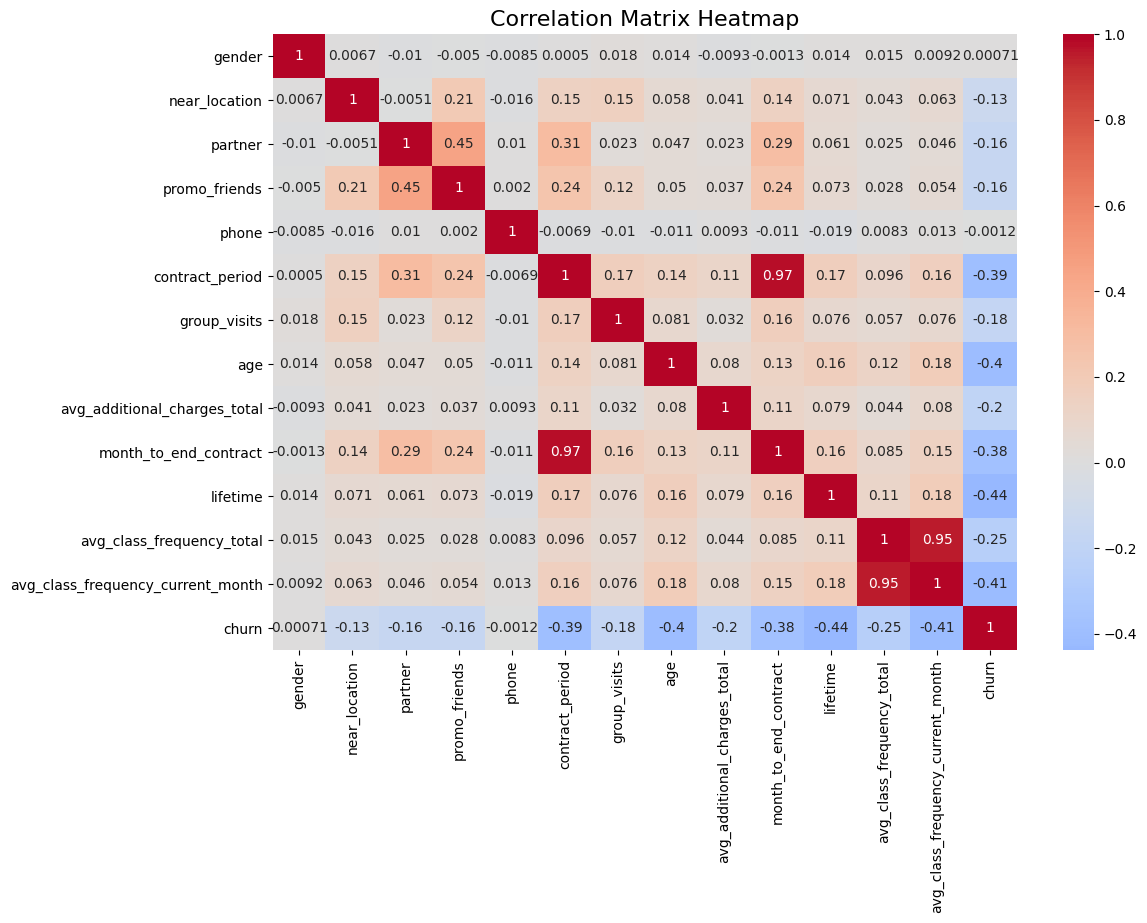

In [24]:
#  Calculating the Correlation Matrix and Plotting the Heatmap
cm = gym.corr()

fig, ax = plt.subplots(figsize=(12, 8))

# Plot the heatmap with annotations
sns.heatmap(cm, annot=True, cmap='coolwarm', center=0, ax=ax)
ax.set_ylim(len(cm), 0)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()


Features with the strongest negative correlations with the churn parameter are 'age,' 'lifetime,' 'contract_period,' 'month_to_end_contract,' and 'avg_class_frecuency_current_month.'
We also see two pairs of features with strong mutual correlation: 'contract_period' and 'month_to_end_contract' and 'avg_class_frequency_current_month' and 'avg_class_frequency_total,' so we might want to remove them.

In [25]:
#dropping features with high correlation
data = gym.drop(['month_to_end_contract', 'avg_class_frequency_current_month'], axis=1)

## Build a model to predict user churn

In [26]:
#dividing the data into features (the X matrix) and a target variable (y)
X = gym.drop('churn', axis=1)
y = gym['churn']

In [27]:
#dividing the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [28]:
#creating a StandardScaler object and applying it to the train set
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)

#applying standardization to the feature matrix for the test set
X_test_st = scaler.transform(X_test)

In [29]:
#defining list of models we would like to check
models = [LogisticRegression(random_state=0), RandomForestClassifier(n_estimators=100, random_state=0)]

In [30]:
#creating a function for training model, making prediction and printing out metrics
def make_prediction(m, X_train, y_train, X_test, y_test):
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    print('Accuracy:{:.2f} Precision:{:.2f} Recall:{:.2f}'.format(accuracy_score(y_test, y_pred), 
                                                                  precision_score(y_test, y_pred),
                                                                  recall_score(y_test, y_pred)))

In [31]:
for i in models:
    print(i)
    make_prediction(i, X_train_st, y_train, X_test_st, y_test)

LogisticRegression(random_state=0)
Accuracy:0.94 Precision:0.90 Recall:0.85
RandomForestClassifier(random_state=0)
Accuracy:0.92 Precision:0.88 Recall:0.83


First, we tackled a binary classification task to predict whether a user will stay or leave (0 or 1). We started with a simple Logistic Regression model due to its straightforward implementation and interpretability. Additionally, we explored a more powerful algorithm, the Random Forest Classifier, to compare performance.

We split the dataset into training and test sets with an 80/20 ratio. This straightforward approach is sufficient for our current needs. We then standardized the feature matrices for the training and test sets to ensure our models perform optimally.
After training the models and making predictions, we evaluated them using accuracy, precision, and recall metrics. These metrics helped us assess each model's performance in predicting user churn.


Both models perform well, with Logistic Regression slightly outperforming Random Forest regarding accuracy, precision, and recall. Also, it's less likely to overfit the data, and requires less computational power. Because of these advantages, Logistic Regression is more suitable for predicting customer churn. Using this model, the gym can make informed decisions to improve customer retention based on data-driven insights.


## Create user clusters

In [32]:
#standardize data
sc = StandardScaler()
X_st = sc.fit_transform(gym.drop(columns = ['churn']))

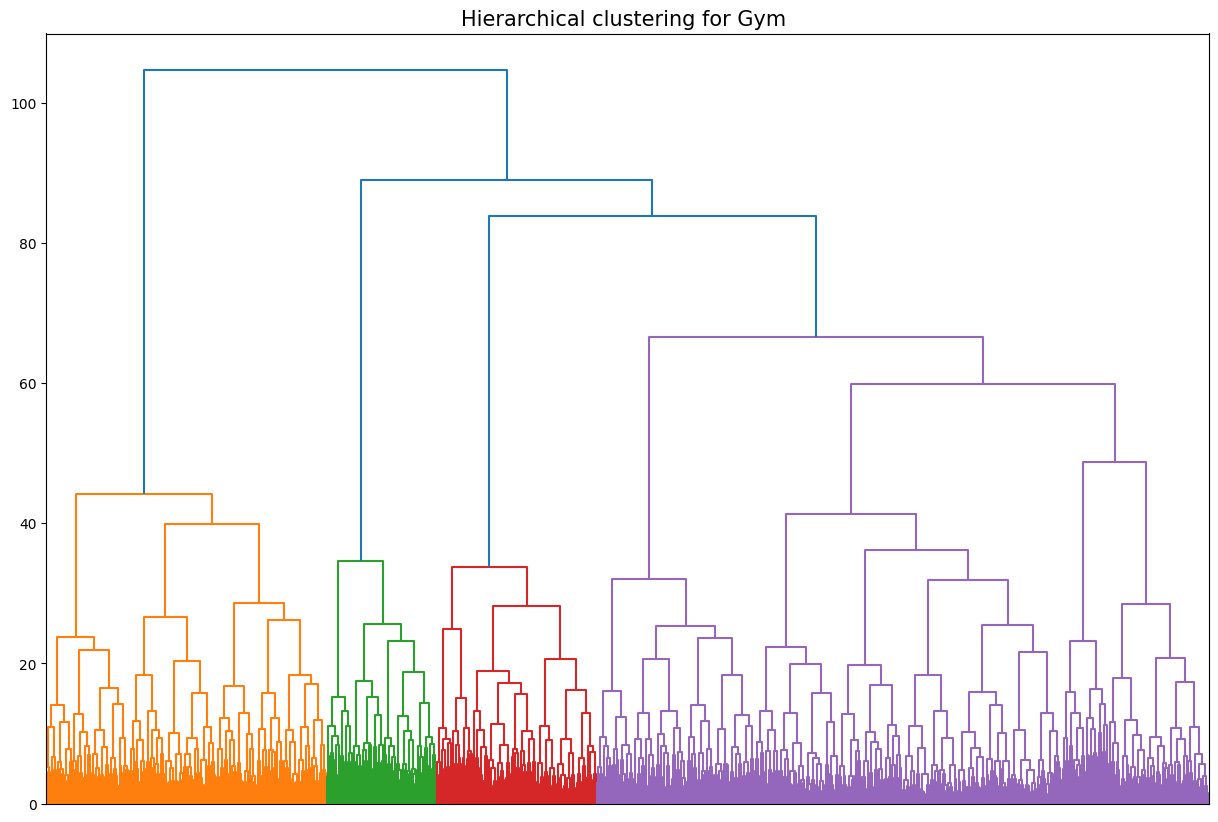

In [33]:
linked = linkage(X_st, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for Gym ', fontsize=15)
# Remove x-axis ticks
plt.xticks([])
plt.show()

We visualized data clusters with the dendrogram. The suggested optimal number of clusters (5) corresponds to the five different colors on the plot.


###  Train the clustering model with the K-means algorithm and predict customer clusters

In [34]:
km = KMeans(n_clusters = 5, random_state=0) 
labels = km.fit_predict(X_st) 

### Look at the mean feature values for clusters

In [35]:
# store cluster labels in the field of dataset
gym['cluster_km'] = labels

In [36]:
gym.groupby(['cluster_km']).mean().T

cluster_km,0,1,2,3,4
gender,0.502970,0.522078,0.495050,0.485737,0.559666
near_location,0.959406,0.862338,0.000000,1.000000,0.976134
partner,0.783168,0.470130,0.463366,0.350238,0.356802
promo_friends,0.574257,0.306494,0.079208,0.240095,0.230310
phone,1.000000,0.000000,1.000000,1.000000,0.998807
contract_period,10.889109,4.787013,2.352475,1.948494,2.669451
group_visits,0.542574,0.425974,0.215842,0.341521,0.473747
age,29.982178,29.301299,28.477228,28.167987,30.125298
avg_additional_charges_total,160.761016,143.957664,135.457501,131.622204,161.657905
month_to_end_contract,9.954455,4.475325,2.198020,1.856577,2.459427


**Plot distributions of features for the clusters. Do you notice anything?**

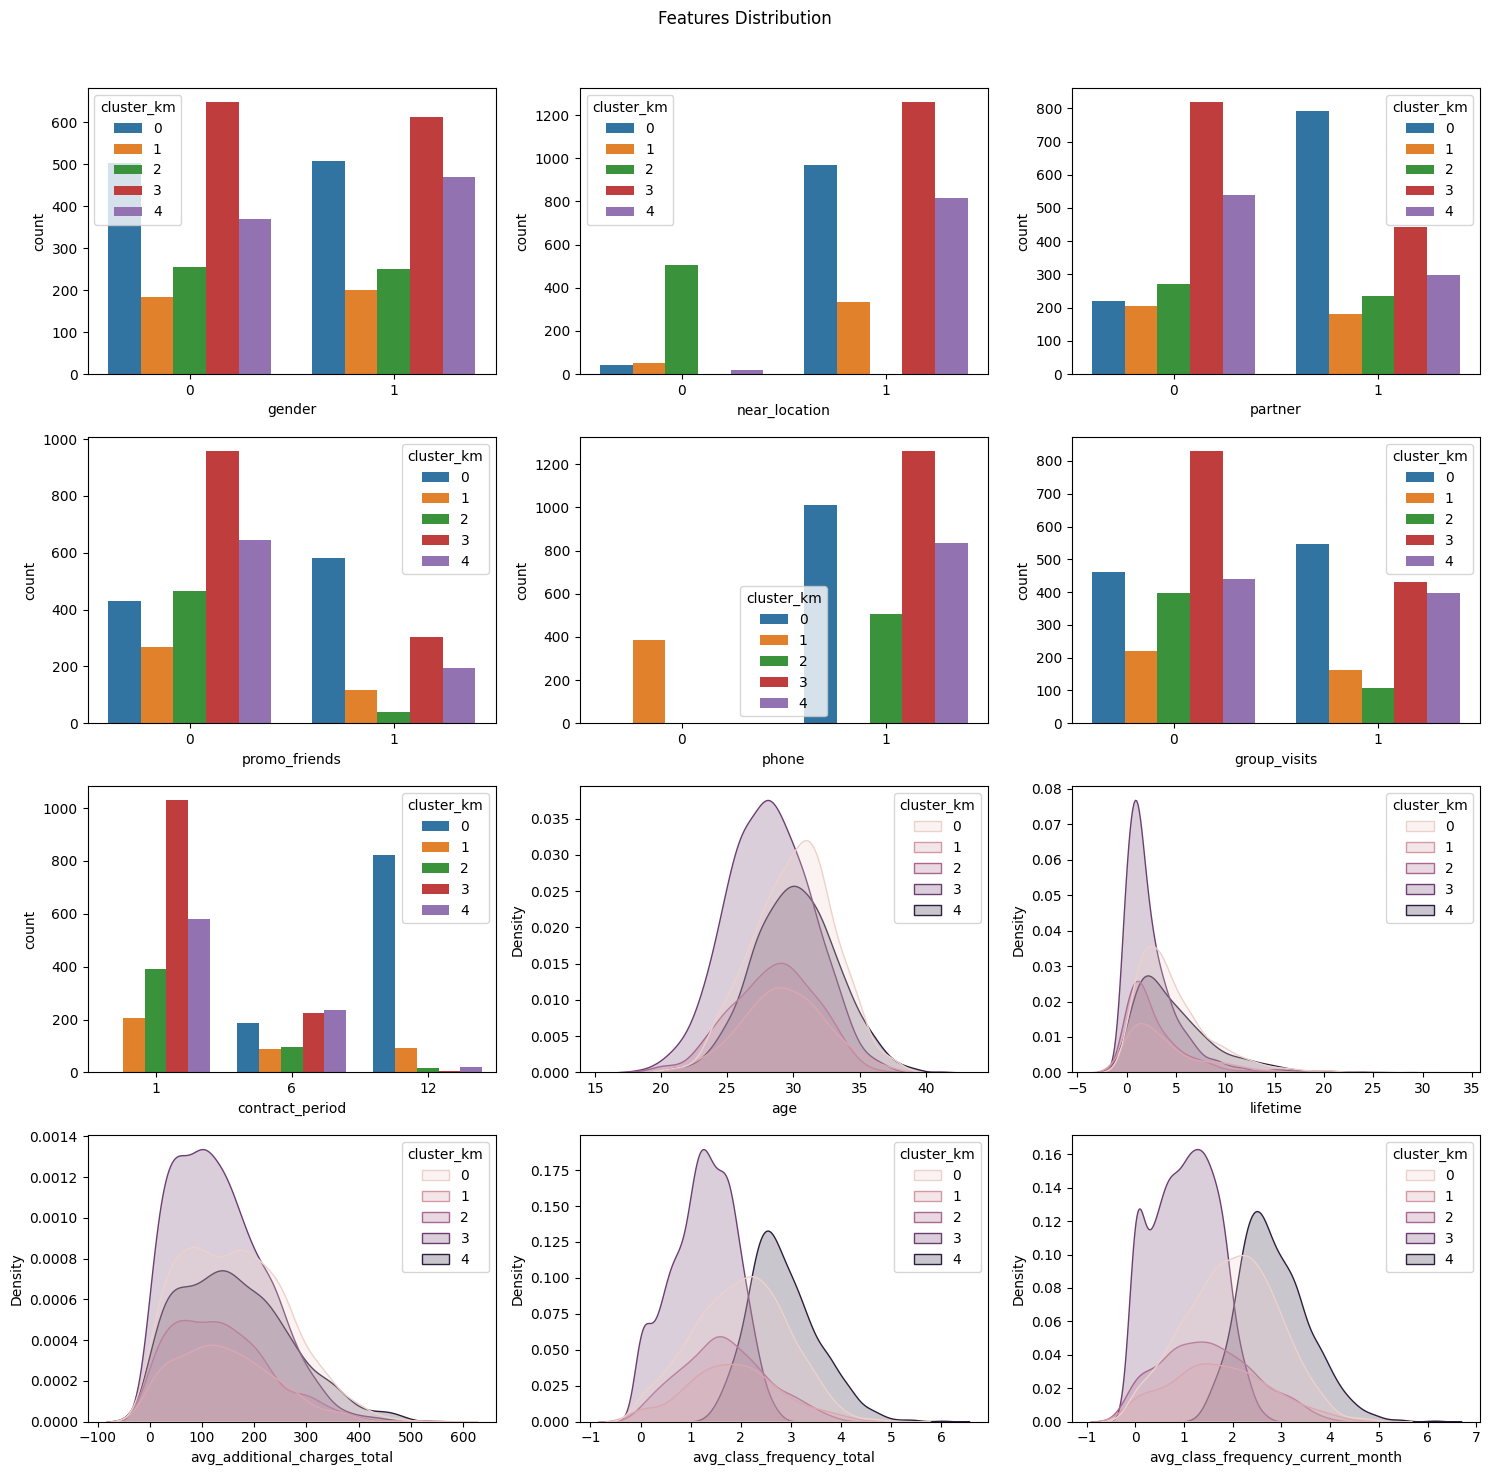

In [37]:
# Plot distributions of features for the clusters in a single pane
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
fig.suptitle('Features Distribution')
sns.set_palette('tab10')

# Count plots for categorical variables
sns.countplot(ax=axes[0, 0], x='gender', data=gym, hue='cluster_km')
sns.countplot(ax=axes[0, 1], x='near_location', data=gym, hue='cluster_km')
sns.countplot(ax=axes[0, 2], x='partner', data=gym, hue='cluster_km')
sns.countplot(ax=axes[1, 0], x='promo_friends', data=gym, hue='cluster_km')
sns.countplot(ax=axes[1, 1], x='phone', data=gym, hue='cluster_km')
sns.countplot(ax=axes[1, 2], x='group_visits', data=gym, hue='cluster_km')
sns.countplot(ax=axes[2, 0], x='contract_period', data=gym, hue='cluster_km')

# KDE plots for continuous variables
sns.kdeplot(ax=axes[2, 1], x="age", data=gym, hue="cluster_km", shade=True)
sns.kdeplot(ax=axes[2, 2], x="lifetime", data=gym, hue="cluster_km", shade=True)
sns.kdeplot(ax=axes[3, 0], x="avg_additional_charges_total", data=gym, hue="cluster_km", shade=True)
sns.kdeplot(ax=axes[3, 1], x="avg_class_frequency_total", data=gym, hue="cluster_km", shade=True)
sns.kdeplot(ax=axes[3, 2], x="avg_class_frequency_current_month", data=gym, hue="cluster_km", shade=True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


We can draw the following observations:


Cluster 4:

High loyalty with lower churn rates.
High engagement with gym services (high additional charges, frequent class attendance, longer lifetimes).
High participation in promotions (partner, promo friends).

Cluster 0:

Loyal with low churn rates.
Balanced engagement, moderate participation in promotions and services.

Cluster 1:

Moderate risk of churn.
Less engagement in gym services and promotions compared to clusters 0 and 4.

Cluster 2:

High risk of churn.
Lower engagement with gym services, fewer promotions taken.

Cluster 3:

Highest risk of churn.
Least engagement with gym services, lowest class attendance, and additional charges.

**Calculate the churn rate for each cluster (use the groupby() method). Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?**

In [38]:
churn_rate = gym.groupby(['cluster_km']).agg({'age':'count', 'churn':'sum'}).reset_index()
churn_rate.columns = ['cluster', 'total_users', 'churn_users']
churn_rate['churn_rate, %'] = ((churn_rate['churn_users'] / churn_rate['total_users']) * 100).round(2)
churn_rate

,cluster,total_users,churn_users,"churn_rate, %"
0,0,1010,28,2.77
1,1,385,103,26.75
2,2,505,224,44.36
3,3,1262,649,51.43
4,4,838,57,6.80


Loyal Clusters:

* Cluster 0: Very low churn rate (2.77%), indicating high loyalty.
* Cluster 4: Low churn rate (6.80%), also indicating high loyalty.

Prone to Leaving:

* Cluster 3: Very high churn rate (51.43%), indicating a high likelihood of users leaving.
* Cluster 2: High churn rate (44.36%), indicating a significant risk of churn.
* Cluster 1: Moderate churn rate (26.75%), showing a noticeable risk of users leaving.

## Conclusions and Recommendations

Based on the analysis of customer data and identified clusters, some crucial insights are presented here, given customer engagement and retention. For example, the churn behavior of Clusters 2 and 3 leads to less interaction with services provided by the gym—that is, fewer classes and promotions. These clusters have shorter contract periods and fewer additional charges, meaning a more minor total commitment to the gym. Higher engagement levels, such as more extended contract periods, regular class participation, and add-on services, will thus be seen in Clusters 0 and 4, reflecting higher loyalty and lower churn rates. Therefore, gyms can create effective customer retention strategies by targeting interaction strategies customized to the characteristics associated with each cluster. 

Here are some suggested marketing actions: 

### Boost Engagement in Risky Clusters: 

**Targeted Promotions:** Roll out more targeted promotions for Clusters 2 and 3 that will motivate longer subscription lengths and more classes attended. For instance, provide a discount for a 6-month or 12-month subscription and an additional inducement, such as free extra services or guest passes, for attending an agreed-upon number of classes. 

**Individualized Communication:** Form a communication plan that speaks to those high-risk clusters' unique needs and wants. Address personalized emails or texts about the advantages of regularly attending class and the benefits of long-term membership.

### Increase Value for Returning Customers:

**Reward Programs:** Implement rewards for High-Risk Clusters 0 and 4 to build loyalty within those clusters, allowing customers to maintain consistent engagement. Provide certain privileges, such as first access to new classes, training sessions that are customized for the individual, or discounts on merchandise, in case they have sustained long-term contracts and high-class attendance. 

**Feedback and Improvement:**
Take input from loyal customers regularly for further improvement and satisfaction.
Implement changes through their suggestions to improve the overall gym experience and let them feel that loyalty is valued—Foster social engagement among all clusters through group activities, events, and challenges.
Encourage members to bring friends and participate in group visits, which have been shown to correlate with higher retention rates.For instance, run monthly fitness challenges with rewards for the best performers or organize themed workout sessions that interest diverse member segments.

These focused strategies will help the gym improve customer engagement in all its clusters, reduce churn rates, and move toward building a more loyal and committed member base.